## Load Data

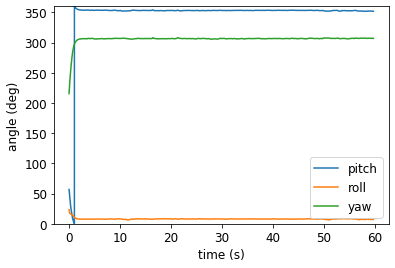

In [103]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from pyquaternion import Quaternion


from scipy.ndimage import gaussian_filter
from scipy.spatial.transform import Rotation as R

import numpy as np

import scipy

import matplotlib 
matplotlib.rc('font', size=12)

std_4 = pd.read_csv('/Volumes/GoogleDrive/My Drive/Harvey Mudd/Work/Summer 2020/project_data/MobiAct_Dataset_v2.0/Annotated Data/SIT/SIT_1_1_annotated.csv')
plt.figure()
times = (std_4.timestamp - std_4.timestamp.values[0])/(10**9)
plt.plot(times,std_4.pitch%360)
plt.plot(times,std_4.roll%360)
plt.plot(times,std_4.azimuth%360)
plt.ylim((0,360))
plt.xlabel('time (s)')
plt.ylabel('angle (deg)')
plt.legend(['pitch','roll','yaw'])

## Plot the x,y,z axis defined by the pitch roll and yaw

Get the quaternion representation of the pitch, roll, yaw rotations

In [113]:
std_ma = np.apply_along_axis(lambda x:np.deg2rad(x),arr = std_4[['azimuth', 'pitch', 'roll']], axis=1)
trans = R.from_euler('zxy',std_ma).as_quat() #returns the scalar last
trans = [Quaternion(imaginary = x[:-1], real = x[-1]) for x in trans]
trans_mat = R.from_euler('zxy',std_ma).as_matrix()

Now plot the x, y, z axis for the first timestamp

In [56]:
def rotate_quat(p,q):
    p_new = (q*p)*q.conjugate
    return p_new

In [48]:
print(trans[0])
print(Quaternion(matrix=trans_mat[0]))

-0.170 +0.029i -0.498j +0.850k
-0.170 +0.029i -0.498j +0.850k


The end result should be the frame of this timestep

[3.76194864 0.99156504 0.41200733]
azimuth (z), pitch (x), roll(y)


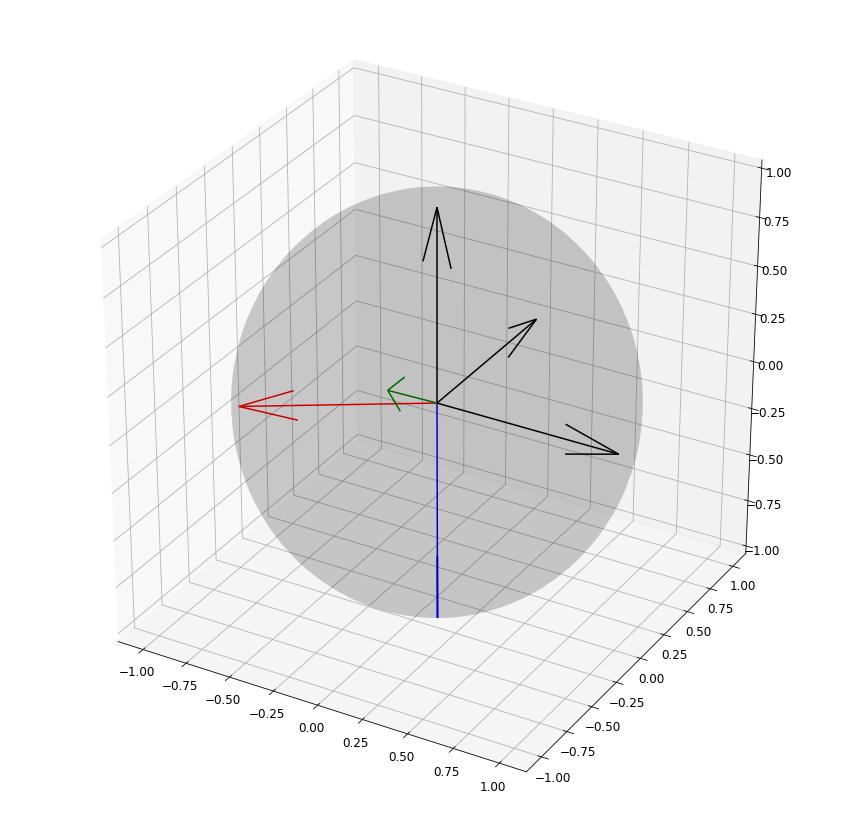

In [58]:

x_0 = rotate_quat(Quaternion(imaginary = [1,0,0]), trans[0]).imaginary
y_0 = rotate_quat(Quaternion(imaginary = [0,1,0]), trans[0]).imaginary
z_0 = rotate_quat(Quaternion(imaginary = [0,0,1]), trans[0]).imaginary

# draw sphere
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,  projection='3d')

u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="k", alpha = .1)
ax.quiver(0,0,0,x_0[0], x_0[1], x_0[2], color = 'r')
ax.quiver(0,0,0,y_0[0], y_0[1], y_0[2], color = 'b')
ax.quiver(0,0,0,z_0[0], z_0[1], z_0[2], color = 'g')
ax.quiver(0,0,0,[1,0,0],[0,1,0],[0,0,1], color = 'k')

print(std_ma[0,:])
print("azimuth (z), pitch (x), roll(y)")

Lets make sure using the good old fashioned rotation matrices

[3.76194864 0.99156504 0.41200733]
azimuth (z), pitch (x), roll(y)


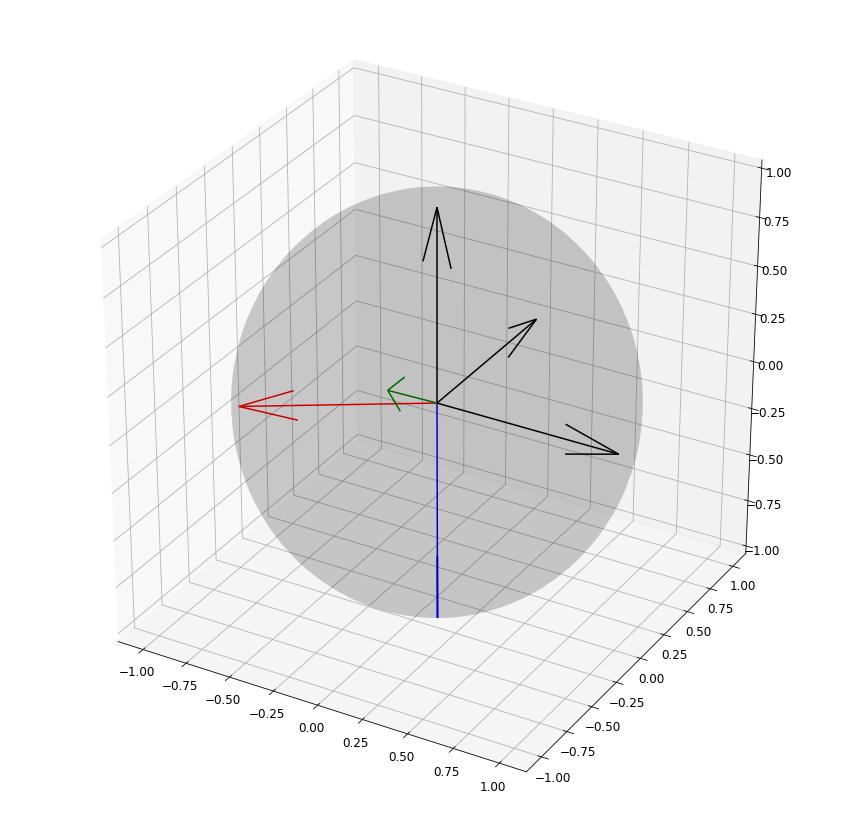

In [50]:
x_0 = trans_mat[0]@np.array([1,0,0]).reshape(-1,1)
y_0 = trans_mat[0]@np.array([0,1,0]).reshape(-1,1)
z_0 = trans_mat[0]@np.array([0,0,1]).reshape(-1,1)

# draw sphere
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,  projection='3d')

u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="k", alpha = .1)
ax.quiver(0,0,0,x_0[0], x_0[1], x_0[2], color = 'r')
ax.quiver(0,0,0,y_0[0], y_0[1], y_0[2], color = 'b')
ax.quiver(0,0,0,z_0[0], z_0[1], z_0[2], color = 'g')
ax.quiver(0,0,0,[1,0,0],[0,1,0],[0,0,1], color = 'k')

print(std_ma[0,:])
print("azimuth (z), pitch (x), roll(y)")


# Mapping Acceleration Vectors

First we will test out the inverse rotation using quaternions, the result should be that they are aligned with the x,y,z axes

[3.76194864 0.99156504 0.41200733]
azimuth (z), pitch (x), roll(y)


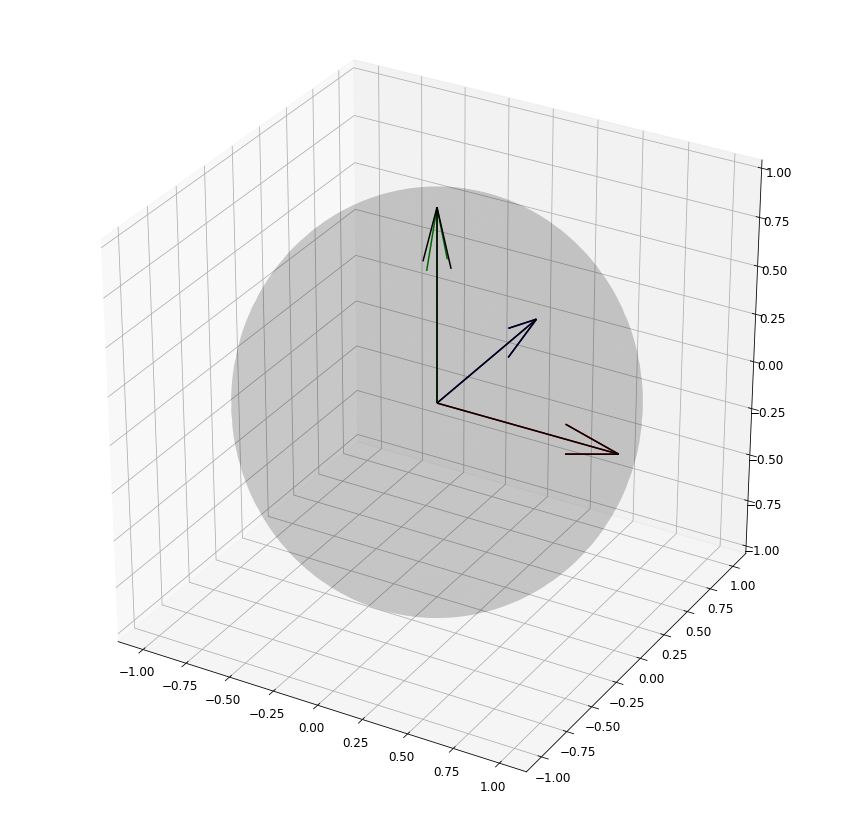

In [60]:
x_0 = rotate_quat(Quaternion(imaginary = [1,0,0]), trans[0])
y_0 = rotate_quat(Quaternion(imaginary = [0,1,0]), trans[0])
z_0 = rotate_quat(Quaternion(imaginary = [0,0,1]), trans[0])

x_1 = rotate_quat(x_0, trans[0].conjugate).imaginary
y_1 = rotate_quat(y_0, trans[0].conjugate).imaginary
z_1 = rotate_quat(z_0, trans[0].conjugate).imaginary

# draw sphere
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,  projection='3d')

u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="k", alpha = .1)
ax.quiver(0,0,0,x_1[0], x_1[1], x_1[2], color = 'r')
ax.quiver(0,0,0,y_1[0], y_1[1], y_1[2], color = 'b')
ax.quiver(0,0,0,z_1[0], z_1[1], z_1[2], color = 'g')
ax.quiver(0,0,0,[1,0,0],[0,1,0],[0,0,1], color = 'k')

print(std_ma[0,:])
print("azimuth (z), pitch (x), roll(y)")

Now rotate the acceleration

In [132]:
acc = std_4[['acc_x', 'acc_y', 'acc_z']].to_numpy()
acc_rot = np.array([rotate_quat(Quaternion(imaginary=acc[i,:]), trans[i].conjugate).imaginary for i in range(1000,acc.shape[0])])

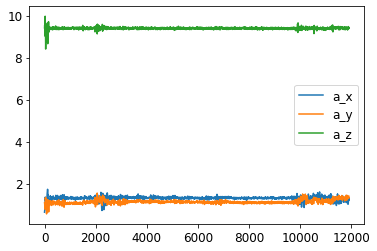

In [133]:
plt.plot(acc)
plt.legend(['a_x', 'a_y', 'a_z'])

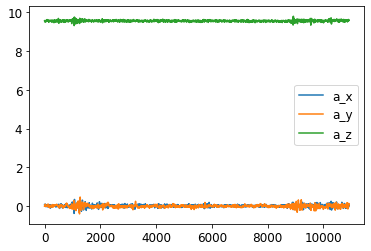

In [134]:
plt.plot(acc_rot)
plt.legend(['a_x', 'a_y', 'a_z'])

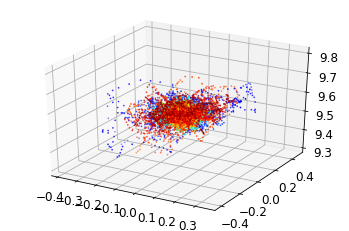

In [136]:
ax = plt.axes(projection='3d')
ax.scatter3D(acc_rot[:,0], acc_rot[:,1], acc_rot[:,2], c=np.arange(acc_rot.shape[0]),cmap='jet',s=0.5)

It seems like this is very much aligned with gravity, i.e. screen facing straight down

Try with jogging

In [71]:
jog = pd.read_csv('/Volumes/GoogleDrive/My Drive/Harvey Mudd/Work/Summer 2020/project_data/MobiAct_Dataset_v2.0/Annotated Data/JOG/JOG_4_1_annotated.csv')

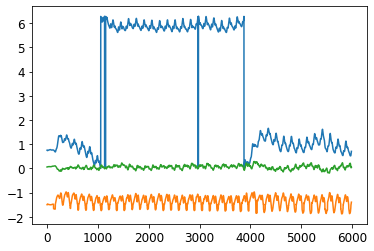

In [144]:
jog_rpy = np.apply_along_axis(lambda x:np.deg2rad(x),arr = jog[['azimuth', 'pitch', 'roll']], axis=1)
trans = R.from_euler('zxy',jog_rpy).as_quat() #returns the scalar last
trans = [Quaternion(imaginary = x[:-1], real = x[-1]) for x in trans]
acc = jog[['acc_x', 'acc_y', 'acc_z']].to_numpy()
acc_rot = np.array([rotate_quat(Quaternion(imaginary=acc[i,:]), trans[i].conjugate).imaginary for i in range(acc.shape[0])])
plt.plot(jog_rpy)

Compare acceleration in the body frame vs. rpy 0 frame

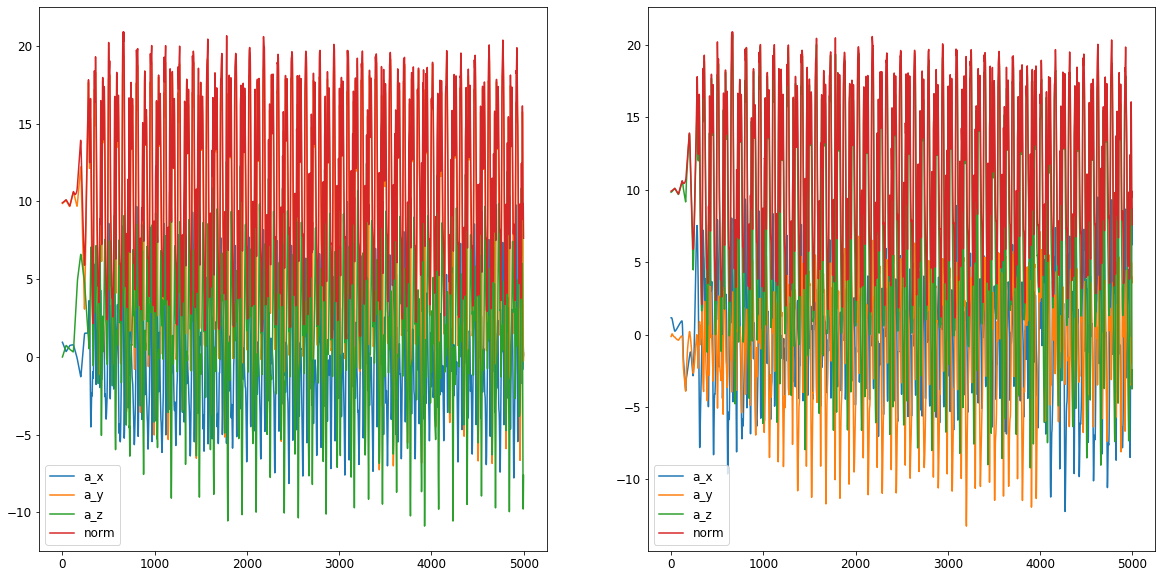

In [141]:
end_n = 5000
f, ax = plt.subplots(nrows=1,ncols=2)
acc_smooth = np.apply_along_axis(lambda x: gaussian_filter(x,2), axis=0, arr =acc[:end_n])
ax[0].plot(acc_smooth)
ax[0].plot(np.linalg.norm(acc_smooth, axis=1))
ax[0].legend(['a_x', 'a_y', 'a_z','norm'])
acc_rot_smooth = np.apply_along_axis(lambda x: gaussian_filter(x,2), axis=0, arr =acc_rot[:end_n])
ax[1].plot(acc_rot_smooth)
ax[1].plot(np.linalg.norm(acc_rot_smooth, axis=1))
ax[1].legend(['a_x', 'a_y', 'a_z','norm'])
f.set_size_inches((20,10))

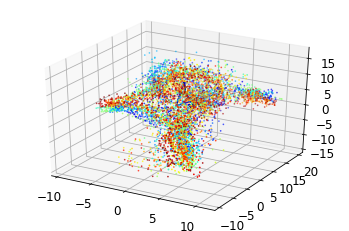

In [142]:
ax = plt.axes(projection='3d')
ax.scatter3D(acc[:,0], acc[:,1], acc[:,2], c=np.arange(acc.shape[0]),cmap='jet',s=0.5)


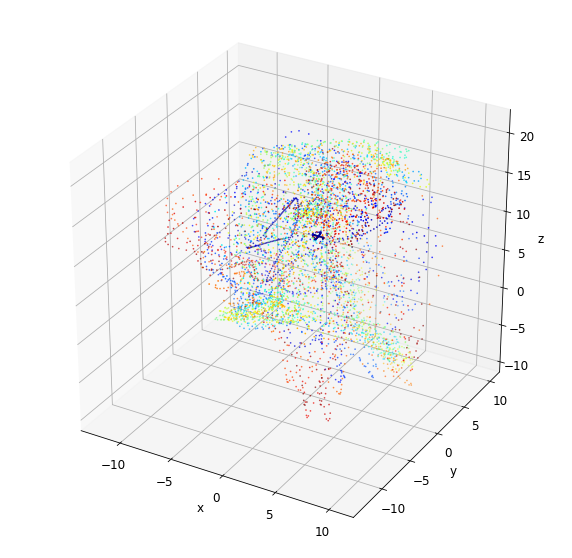

In [143]:
ax = plt.axes(projection='3d')
ax.scatter3D(acc_rot_smooth[:,0], acc_rot_smooth[:,1], acc_rot_smooth[:,2], c=np.arange(acc_rot_smooth.shape[0]),cmap='jet',s=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.gcf().set_size_inches((10,10))

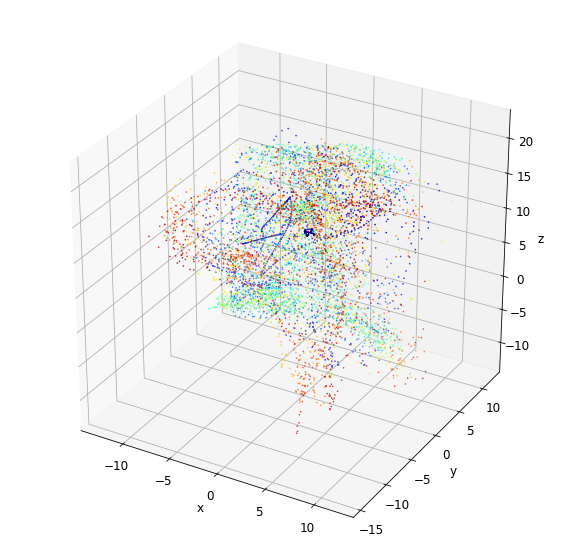

In [109]:
plt.plot(acc_smooth[:])